In [2]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

In [3]:
ceosal1 = pd.read_csv("ceosal1.csv")

In [4]:
ceosal1

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
0,1095,20,27595.000000,14.1,106.400002,191,1,0,0,0,6.998509,10.225389
1,1001,32,9958.000000,10.9,-30.600000,13,1,0,0,0,6.908755,9.206132
2,1122,9,6125.899902,23.5,-16.299999,14,1,0,0,0,7.022868,8.720281
3,578,-9,16246.000000,5.9,-25.700001,-21,1,0,0,0,6.359574,9.695602
4,1368,7,21783.199219,13.8,-3.000000,56,1,0,0,0,7.221105,9.988894
...,...,...,...,...,...,...,...,...,...,...,...,...
204,930,10,1509.099976,9.0,20.500000,131,0,0,0,1,6.835185,7.319269
205,525,3,1097.099976,15.5,20.100000,72,0,0,0,1,6.263398,7.000426
206,658,32,4542.600098,12.1,-7.800000,68,0,0,0,1,6.489205,8.421255
207,555,6,2023.000000,13.7,-14.600000,60,0,0,0,1,6.318968,7.612337


In [5]:
ceosal1.describe()

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1281.119617,13.282297,6923.793282,17.184211,10.800478,61.803828,0.320574,0.220096,0.287081,0.172249,6.950386,8.292265
std,1372.345308,32.633921,10633.271088,8.518509,97.219399,68.177052,0.467818,0.415306,0.453486,0.378503,0.566374,1.013161
min,223.000000,-61.000000,175.199997,0.500000,-98.900002,-58.000000,0.000000,0.000000,0.000000,0.000000,5.407172,5.165928
25%,736.000000,-1.000000,2210.300049,12.400000,-21.200001,21.000000,0.000000,0.000000,0.000000,0.000000,6.601230,7.700883
50%,1039.000000,9.000000,3705.199951,15.500000,-3.000000,52.000000,0.000000,0.000000,0.000000,0.000000,6.946014,8.217492
75%,1407.000000,20.000000,7177.000000,20.000000,19.500000,81.000000,1.000000,0.000000,1.000000,0.000000,7.249215,8.878636
max,14822.000000,212.000000,97649.898438,56.299999,977.000000,418.000000,1.000000,1.000000,1.000000,1.000000,9.603868,11.489144


In [7]:
x = ceosal1['roe']
y = ceosal1['salary']


In [8]:
cov_xy = np.cov(x,y)[1,0]
var_x = np.var(x, ddof=1)

In [9]:
x_bar = np.mean(x)
y_bar = np.mean(y)

In [10]:
#manual calculation of OLS coeff:

b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar

In [11]:
#instead of doing manually - can use statsmodels module 
#dependent var should be in y 
#regressor should be in x

import statsmodels.formula.api as smf

In [13]:
#OLS Regression
reg = smf.ols(formula='y~x', data=ceosal1)
results = reg.fit()

In [14]:
reg

In [15]:
results

In [16]:
results.params

Intercept    963.191336
x             18.501186
dtype: float64

<IPython.core.display.Javascript object>


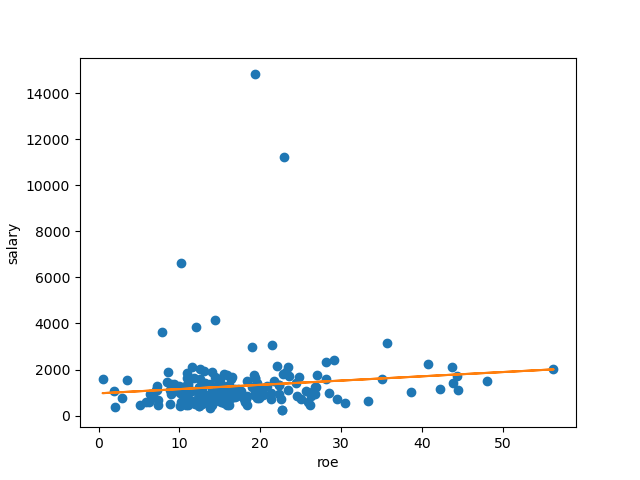

Text(0.5, 0, 'roe')

In [22]:
# 2.3
#SCATTER PLOT AND FITTED VALUES
plt.plot('roe', 'salary', data=ceosal1, marker='o', linestyle='')
plt.plot(ceosal1['roe'], results.fittedvalues)
plt.ylabel('salary')
plt.xlabel('roe')

In [23]:
#PREDICTED VALUES AND RESIDUALS
salary_hat = results.fittedvalues
u_hat = results.resid

In [24]:
table = pd.DataFrame({'roe':ceosal1['roe'],
                     'salary': ceosal1['salary'],
                     'salary_hat': salary_hat,
                     'u_hat': u_hat})
table

,roe,salary,salary_hat,u_hat
0,14.1,1095,1224.058071,-129.058071
1,10.9,1001,1164.854261,-163.854261
2,23.5,1122,1397.969216,-275.969216
3,5.9,578,1072.348338,-494.348338
4,13.8,1368,1218.507712,149.492288
...,...,...,...,...
204,9.0,930,1129.702014,-199.702014
205,15.5,525,1249.959725,-724.959725
206,12.1,658,1187.055698,-529.055698
207,13.7,555,1216.657586,-661.657586


In [25]:
#CONFIRM PROPERTIES OF OLS STATISTICS
#1 PROPERTY (sum of u_hats should be close to 0)
np.mean(u_hat)


-4.699781234041926e-13

In [ ]:
#2 PROPERTY (sum of x*u_hats should be Cov(x*u_hat) should to close to 0)

In [28]:
np.cov(ceosal1['roe'], u_hat)[1,0]

-8.215752952319552e-14

In [ ]:
#3 PROPERTY (y_bar = b0_hat + (b1_hat * x)) (predicted = mean)

In [31]:
salary_mean = np.mean(ceosal1['salary'])
salary_pred = b0[0] + b1[1] * salary_mean

IndexError: invalid index to scalar variable.

In [46]:
salary_mean = np.mean(ceosal1['salary'])

In [47]:
salary_mean

1281.1196172248804

In [44]:
roe_mean = np.mean(ceosal1['roe'])
salary_pred = results.params[0] + results.params[1]* roe_mean

In [45]:
salary_pred

1281.1196172248808

In [ ]:
#GOODNESS OF FIT
#CALCULATE R^2 THREE DIFFERENT WAYS (SST, SSE (explained), SSR (residual))

In [49]:
#SST
sal = ceosal1['salary']
R2_T = np.var(salary_hat, ddof=1) /np.var(sal, ddof=1)
R2_T

0.013188624081034113

In [51]:
R2_E = 1 - np.var(u_hat, ddof=1) / np.var(sal, ddof=1)
R2_E

0.01318862408103394

In [53]:
R2_R = np.corrcoef(sal, salary_hat)[1,0] **2
R2_R

0.013188624081034125

In [55]:
#RESULTS FROM SUMMARY
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.767
Date:                Thu, 25 Mar 2021   Prob (F-statistic):             0.0978
Time:                        16:17:03   Log-Likelihood:                -1804.5
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    963.1913    213.240      4.517      0.000     542.790    1383.592
x             18.5012     11.123      1.663      0.098      -3.428      40.431
==============================================================================
Omnibus:                      311.096   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31120.902
Skew:                           6.915   Prob(JB):                         0.00
Kurtosis:                      61.158   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
pd.DataFrame({'b': round(results.params, 4),
             'se': round(results.bse, 4),
             't': round(results.tvalues, 4),
            'pval':round(results.pvalues, 4)})

,b,se,t,pval
Intercept,963.1913,213.2403,4.5169,0.0000
x,18.5012,11.1233,1.6633,0.0978


In [57]:
#ESTIMATING NONLINEAR MODELS
wage = pd.read_csv("wage1.csv")

In [65]:
regr = smf.ols(formula = 'np.log(wage) ~ educ', data=wage)
resultsr = regr.fit()
r = resultsr.params


In [66]:
r

Intercept    0.583773
educ         0.082744
dtype: float64

In [67]:
resultsr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     119.6
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           3.27e-25
Time:                        16:24:54   Log-Likelihood:                -359.38
No. Observations:                 526   AIC:                             722.8
Df Residuals:                     524   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097      5.998      0.000       0.393       0.775
educ           0.0827      0.008     10.935      0.000       0.068       0.098
==============================================================================
Omnibus:                       11.804   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.811
Skew:                           0.268   Prob(JB):                      0.00100
Kurtosis:                       3.586   Cond. No.                         60.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""